In [4]:
import os
import sys
sys.path.append(os.path.abspath(".."))

In [5]:
import torch
import seaborn as sns
import ristretto.activations as ra
import ristretto.models as rm
import ristretto.utils as ru
import pandas as pd
import numpy as np
# from torch.utils.tensorboard import SummaryWriter

In [6]:
# set pytorch precision
torch.set_default_tensor_type(torch.FloatTensor)
torch.set_default_dtype(torch.float32)

In [7]:
@torch.no_grad()
def get_weight_sum(model):
    return sum([x.weight.sum() for x in model.linear]).item()

In [53]:
depths  = [2, 10, 20]
dims    = [20, 50, 100, 200]
hidden_dims = []

for dim in dims:
    for depth in depths:
        hidden_dims.append([dim] * depth)

print(hidden_dims)
        
        
models_fully = [
    rm.FullyConnected(activation=lambda: ra.ReLU(0), hidden_dims=hidden_dims[0], seed=42),
    rm.FullyConnected(activation=lambda: ra.ReLU(0), hidden_dims=hidden_dims[0], seed=42),
    rm.FullyConnected(activation=lambda: ra.ReLU(1), hidden_dims=hidden_dims[0], seed=42),
    #rm.FullyConnected(activation=lambda: ra.ReLU(0), hidden_dims=[2000], seed=42),
    #rm.FullyConnected(activation=lambda: ra.ReLU(1), hidden_dims=[2000], seed=42)
]

[[20, 20], [20, 20, 20, 20, 20, 20, 20, 20, 20, 20], [20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20], [50, 50], [50, 50, 50, 50, 50, 50, 50, 50, 50, 50], [50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50], [100, 100], [100, 100, 100, 100, 100, 100, 100, 100, 100, 100], [100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100], [200, 200], [200, 200, 200, 200, 200, 200, 200, 200, 200, 200], [200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200]]


In [54]:
# # train_multiple_models(models, data_loader, epochs=10,
#     optimizer_fn=_optim.Adam,optimizer_kwargs={}, criterion=_F.cross_entropy,
#     device=_default.DEVICE, metrics_fn=None, verbose=False )
DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")

metrics = ru.train_multiple_models(
    models_fully,
    ru.default.DATA_LOADERS['MNIST'],
    epochs=2,
    metrics_fn=lambda m, p, y: {"weight_sum": get_weight_sum(m)}
)

===== Model 1 (FullyConnected) =====
---------- Epoch 1 ----------
Validation
    loss:     3.866e-01
    accuracy: 89.14
---------- Epoch 2 ----------
Validation
    loss:     3.587e-01
    accuracy: 90.21

===== Model 2 (FullyConnected) =====
---------- Epoch 1 ----------
Validation
    loss:     3.866e-01
    accuracy: 89.14
---------- Epoch 2 ----------
Validation
    loss:     3.587e-01
    accuracy: 90.21

===== Model 3 (FullyConnected) =====
---------- Epoch 1 ----------
Validation
    loss:     3.885e-01
    accuracy: 89.03
---------- Epoch 2 ----------
Validation
    loss:     3.605e-01
    accuracy: 90.24



In [83]:
print("numbers models: ",len(metrics),"Which contain: ")
print(metrics[0].keys())
print('train contains: ')
print(metrics[0]['train'].keys()) 
print('validation contains: ')
print(metrics[0]['validation'].keys()) 


numbers models:  3 Which contain: 
dict_keys(['train', 'validation'])
train contains: 
Index(['loss', 'accuracy', 'weight_sum'], dtype='object')
validation contains: 
Index(['loss', 'correct', 'weight_sum'], dtype='object')


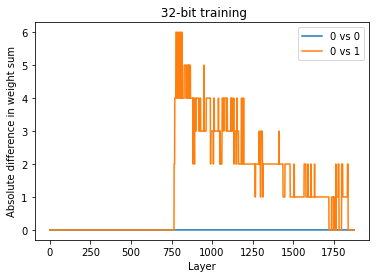

In [59]:
import matplotlib.pyplot as plt

diff = pd.DataFrame({
    "0 vs 0": np.abs(metrics[0]["train"]['weight_sum'] - metrics[1]["train"]['weight_sum']),
    "0 vs 1": np.abs(metrics[0]["train"]['weight_sum'] - metrics[2]["train"]['weight_sum'])
})

sns.lineplot(data=diff, dashes=False);
plt.title(" 32-bit training")
plt.xlabel("Layer")
plt.ylabel("Absolute difference in weight sum");

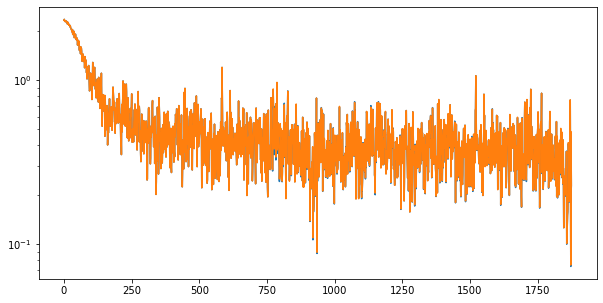

In [87]:
fig = plt.figure(figsize=(10, 5))
plt.plot(metrics[0]["train"]['loss'], label='ReLU 0')
plt.plot(metrics[2]["train"]['loss'], label='ReLU 1')
plt.yscale('log')

### When trained with 16-bit precision the difference between the models is even greater

In [48]:
# set pytorch precision
torch.set_default_tensor_type(torch.FloatTensor)
torch.set_default_dtype(torch.bfloat16)

In [49]:
depths  = [2, 10, 20]
dims    = [20, 50, 100, 200]
hidden_dims = []

for dim in dims:
    for depth in depths:
        hidden_dims.append([dim] * depth)

print(hidden_dims)
        
        
models_fully_16 = [
    rm.FullyConnected(activation=lambda: ra.ReLU(0), hidden_dims=hidden_dims[0], seed=42),
    rm.FullyConnected(activation=lambda: ra.ReLU(0), hidden_dims=hidden_dims[0], seed=42),
    rm.FullyConnected(activation=lambda: ra.ReLU(1), hidden_dims=hidden_dims[0], seed=42),
    #rm.FullyConnected(activation=lambda: ra.ReLU(0), hidden_dims=[2000], seed=42),
    #rm.FullyConnected(activation=lambda: ra.ReLU(1), hidden_dims=[2000], seed=42)
]

# models = [
#     rm.FullyConnected(activation=lambda: ra.ReLU(0), hidden_dims=[2000], seed=42),
#     rm.FullyConnected(activation=lambda: ra.ReLU(0), hidden_dims=[2000], seed=42),
#     rm.FullyConnected(activation=lambda: ra.ReLU(1), hidden_dims=[2000], seed=42)
# ]

[[20, 20], [20, 20, 20, 20, 20, 20, 20, 20, 20, 20], [20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20], [50, 50], [50, 50, 50, 50, 50, 50, 50, 50, 50, 50], [50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50], [100, 100], [100, 100, 100, 100, 100, 100, 100, 100, 100, 100], [100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100], [200, 200], [200, 200, 200, 200, 200, 200, 200, 200, 200, 200], [200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200]]


In [50]:
metrics = ru.train_multiple_models(
    models_fully_16,
    ru.default.DATA_LOADERS['MNIST'],
    epochs=2,
    metrics_fn=lambda m, p, y: {"weight_sum": get_weight_sum(m)}
)

===== Model 1 (FullyConnected) =====
---------- Epoch 1 ----------
Validation
    loss:     3.866e-01
    accuracy: 89.14
---------- Epoch 2 ----------
Validation
    loss:     3.587e-01
    accuracy: 90.21

===== Model 2 (FullyConnected) =====
---------- Epoch 1 ----------
Validation
    loss:     3.885e-01
    accuracy: 89.03
---------- Epoch 2 ----------
Validation
    loss:     3.605e-01
    accuracy: 90.24

===== Model 3 (FullyConnected) =====
---------- Epoch 1 ----------
Validation
    loss:     3.915e-01
    accuracy: 89.02
---------- Epoch 2 ----------
Validation
    loss:     3.653e-01
    accuracy: 89.99



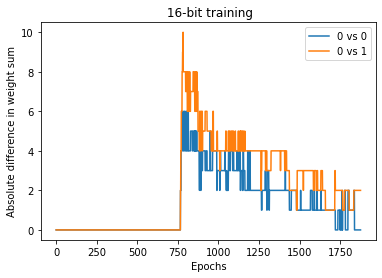

In [51]:
diff = pd.DataFrame({
    "0 vs 0": np.abs(metrics[0]["train"]['weight_sum'] - metrics[1]["train"]['weight_sum']),
    "0 vs 1": np.abs(metrics[0]["train"]['weight_sum'] - metrics[2]["train"]['weight_sum'])
})
sns.lineplot(data=diff, dashes=False);
plt.title(" 16-bit training");
plt.xlabel("Epochs");
plt.ylabel("Absolute difference in weight sum");